# Amazon Review Sentiment Analysis and modelling (Compared with Flair's models)

# 1. Install and Import Necessary Libray For NLP and Sentiment Analysis

In [1]:
%%capture
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter

In [2]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# 2. Import Amazon Product Reviews Dataset and Basic Cleaning

In [3]:
df = pd.read_csv('../input/amazon-product-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Missing Value Handling

In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isnull().sum().sum()

0

### Duplicate Values Handling

In [7]:
df = df.drop_duplicates(keep='first')

### We can see the ammount of scoring of each review

In [8]:
df.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

### Then we classify score values to sentiment. For score values above 3, we classify them into positive sentiment, and for score values below 3 we classify them into negative sentiment

In [9]:
def score_round(x):
    if x>=3:
        return 1
    else: 
        return 0

In [10]:
df['Score_New']=df['Score'].apply(score_round)


In [11]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [12]:
df.Score_New.value_counts()

1    486404
0     82007
Name: Score_New, dtype: int64

In [13]:
review=df.copy()

In [14]:
review.shape

(568411, 11)

# 3. Analysis and Visualization

## 3.1. Wordclouds For all text and Summary Reviews

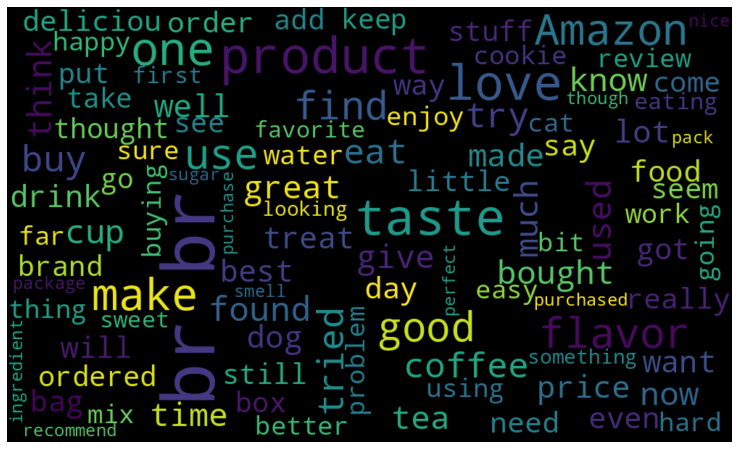

In [15]:
txt = ' '.join(rev for rev in review.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()


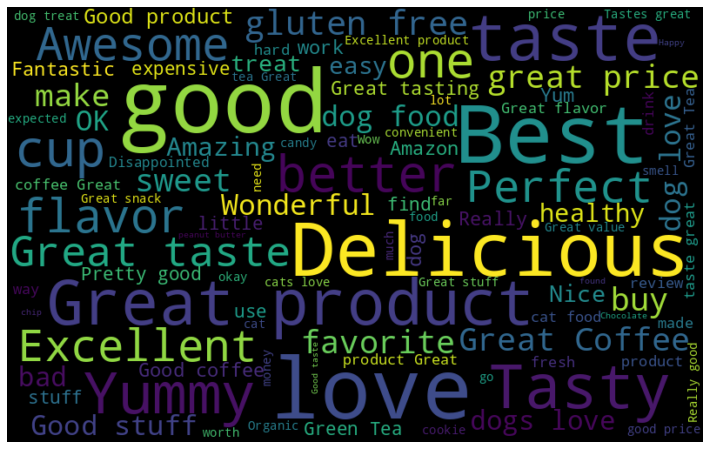

In [16]:
txt = ' '.join(rev for rev in review.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 3.2. Wordclouds For Each Positive and Negative Sentiment Reviews

## Positive Sentiment

In [17]:
review_positive = review[review['Score_New']==1]

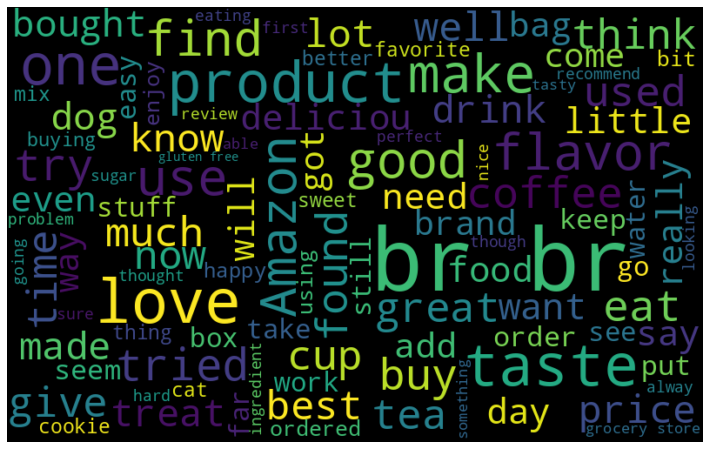

In [18]:
txt = ' '.join(rev for rev in review_positive.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

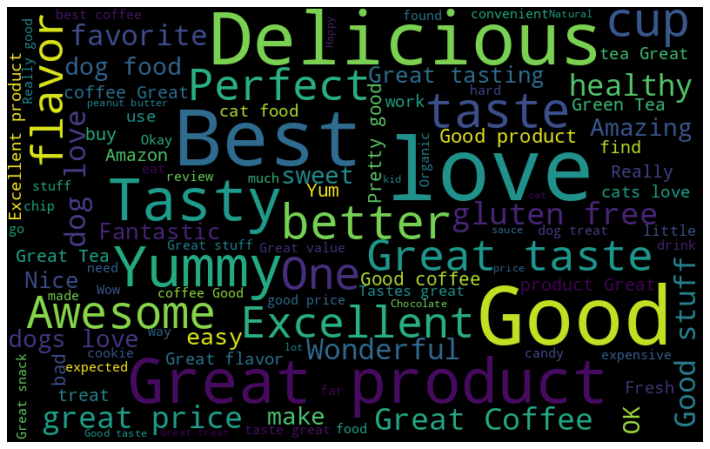

In [19]:
txt = ' '.join(rev for rev in review_positive.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### We have better view when we see our review summary's wordcloud. We can see that for postive sentiment review, the most common words are 'Best','Yummy','Awesome','Great', etc as shown in picture above.

## Negative Sentiment

In [20]:
review_negative = review[review['Score_New']==0]

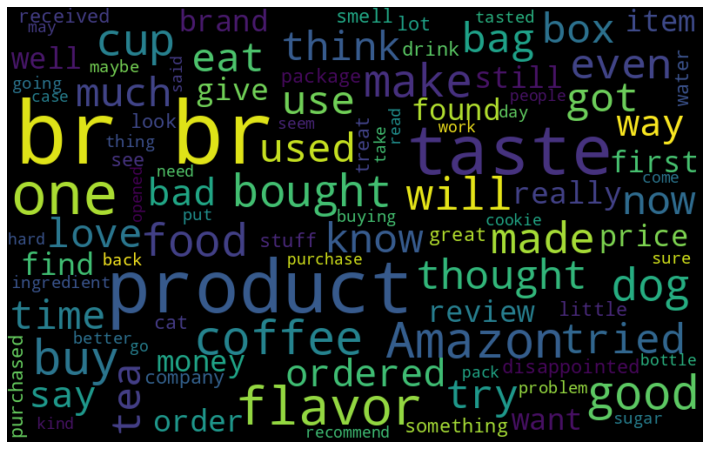

In [21]:
txt = ' '.join(rev for rev in review_negative.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

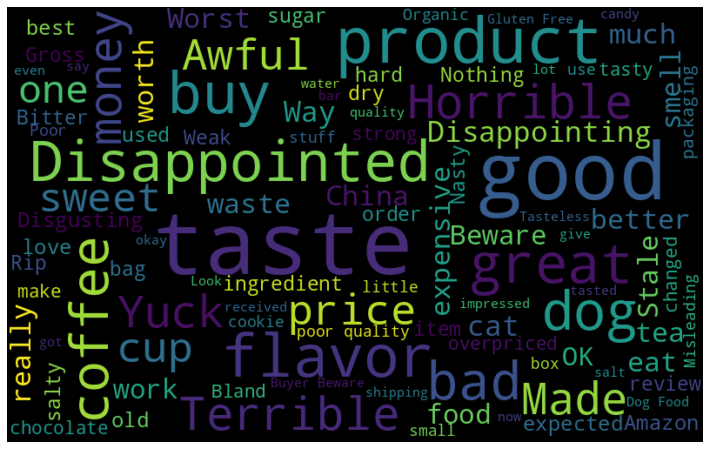

In [22]:
txt = ' '.join(rev for rev in review_negative.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Same as before, we have better view when we see our review summary's wordcloud. We can see that for negative sentiment review, the most common words are 'Disappointed', 'Horrible', 'Terrible', 'Dissapointing', etc as shown in picture above.

### But we can see that there are words like 'good' and  'great'. They maybe come from sentences like "...not great" or "...not good".

## 3.3. Distribution of Sentiment Reviews

In [23]:
review_vis = review.copy()
review_vis['Score_New'] = review_vis['Score_New'].replace({0 : 'negative'})
review_vis['Score_New'] = review_vis['Score_New'].replace({1 : 'positive'})


In [24]:
temp = review_vis.groupby('Score_New').count()['Summary'].reset_index().sort_values(by='Summary',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Score_New,Summary
1,positive,486404
0,negative,82007


**We can plot them**

<AxesSubplot:xlabel='Score_New', ylabel='count'>

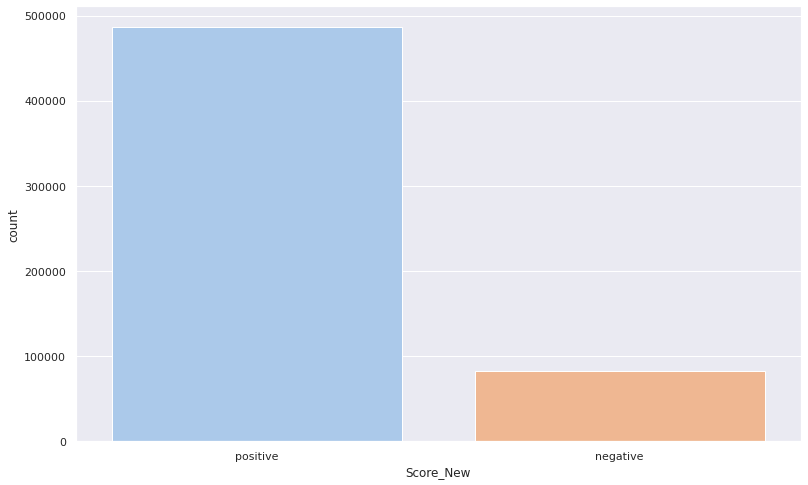

In [25]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='Score_New',data=review_vis)


### Then we see that positive sentiments dominate our review data.

## 3.4. Number of Review Words Distribution

### First we create additional features to count number of words in our review texts.

In [26]:
review_vis['Num_text_review'] = review_vis['Text'].apply(lambda x:len(str(x).split()))
review_vis['Num_summary_review'] = review_vis['Summary'].apply(lambda x:len(str(x).split()))

### Then we can plot number of words from summary and full review texts

<AxesSubplot:xlabel='Num_text_review', ylabel='Count'>

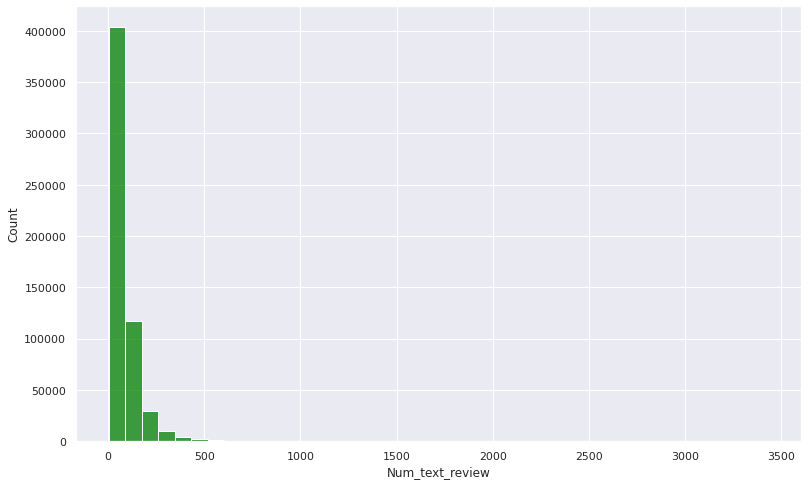

In [27]:
sns.histplot(data=review_vis, x="Num_text_review",bins=40,color='green')

<AxesSubplot:xlabel='Num_summary_review', ylabel='Count'>

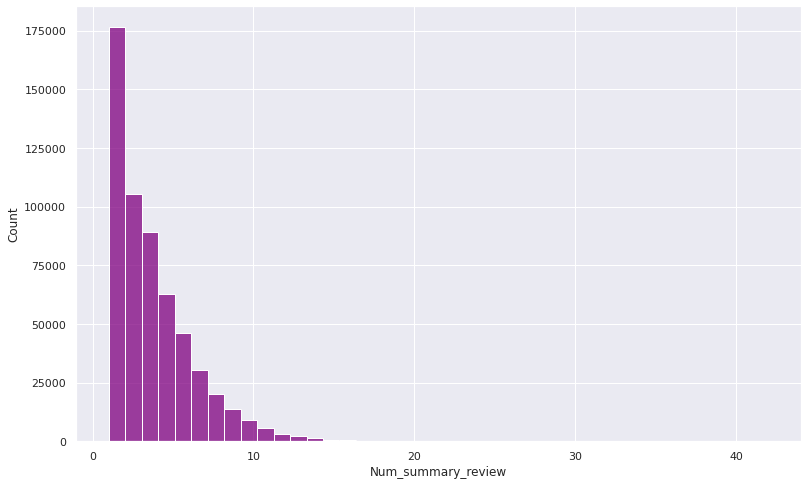

In [28]:
sns.histplot(data=review_vis, x="Num_summary_review",bins=40,color='purple')

# 4. Data Cleaning for Sentiment Processing

In [29]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### We make a function to clean some basic characters

In [30]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

### We make function to remove numeric

In [31]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

### We make a function to clean and remove emoji (if there is some)

In [32]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

### We make a function to clean unnecessary whitespaces

In [33]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

### We make a function to clean and remove symbols

In [34]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

### We make a function to remove punctuation

In [35]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

### We make function to remove stopwords

In [36]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

### We make function to use stemming to normalize words.

In [37]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

### Then we combine all cleaning functions

In [38]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [39]:
cleaning(review,'Text')
cleaning(review,'Summary')

### We have cleaned the review summary and texts. Now we will try to visualize the common words distribution of our review texts.

In [40]:
review_vis2 = review.copy()

In [41]:
review_vis2['temp_list'] = review_vis2['Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,br,647112
1,like,288077
2,tast,264188
3,flavor,220357
4,good,203991
5,one,192540
6,love,187537
7,product,184557
8,use,175823
9,coffe,172919


<AxesSubplot:xlabel='count', ylabel='Common_words'>

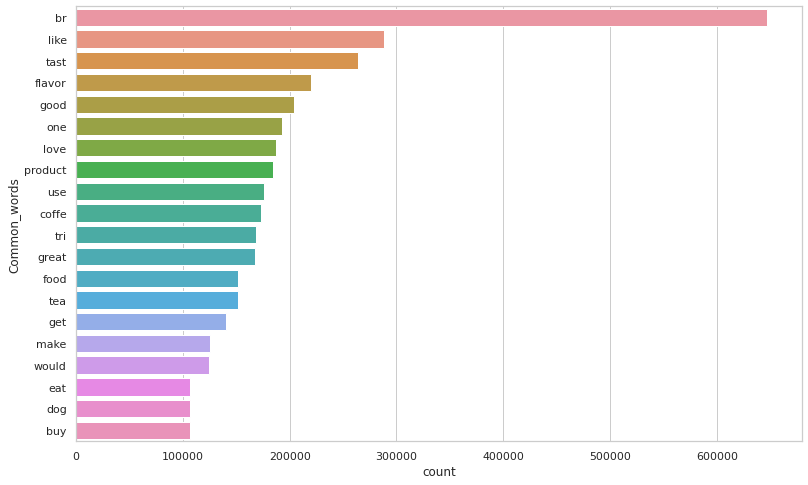

In [42]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

# 5. Bag of Words by Using Vectorizer

In [43]:
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good qualiti dog food,bought sever vital can dog food product found ...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertis,product arriv label jumbo salt peanutsth peanu...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight say,confect around centuri light pillowi citrus ge...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicin,look secret ingredi robitussin believ found go...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffi,great taffi great price wide assort yummi taff...,1


## We split our data to train and test data

In [44]:
# random split train and test 
index = df.index
review['random_number'] = np.random.randn(len(index))
train = review[review['random_number'] <= 0.8]
test = review[review['random_number'] > 0.8]


In [45]:
train.shape

(447522, 12)

In [46]:
test.shape

(120889, 12)

## Then we tokenize our review summary using count vectorizer

In [47]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [48]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Score_New']
y_test = test['Score_New']

# 6. Machine Learning Modelling

## 6.1. Logistic Reression Model

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [50]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
# Model Prediction

predictions = lr.predict(X_test)

In [52]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
new = np.asarray(y_test)
confusion_matrix(y_test,predictions)


array([[  8352,   9024],
       [  2565, 100948]])

In [53]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred)))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))


In [54]:
Confusion_Matrix(y_test,predictions)

TN - True Negative 8352
FP - False Positive 9024
FN - False Negative 2565
TP - True Positive 100948
Accuracy Rate: 0.9041351984051486
F1-Score: 0.9457151556315433
Misclassification Rate: 0.09586480159485147


### We got our result with model accuracy of 91.21% and F1-Score of 94.97%.

# 7. Compared With Text Classification Model From Flair Package

### We will compare our machine learning model's performance with text classification model from flair package. 

### Flair is a simple to use framework for state of the art NLP.  It provided various functionalities such as pre-trained sentiment analysis models, text embeddings, Named Entity Recognition (NER), etc. This model from Flair splits the text into character-level tokens and uses the DistilBERT model to make predictions. This pre-trained model was trained using IMDB review dataset.

## 7.1. Import Text Classifier Model From Flair

In [55]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-04-20 04:40:31,758 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp7_uhfv_l


100%|██████████| 265512723/265512723 [00:11<00:00, 23841668.65B/s]

2022-04-20 04:40:43,281 copying /tmp/tmp7_uhfv_l to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-04-20 04:40:43,640 removing temp file /tmp/tmp7_uhfv_l
2022-04-20 04:40:43,680 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [56]:
def flair_prediction(x):

    sentence = Sentence(x)
    
    try:        
        sentiment_model.predict(sentence)
        score = sentence.labels[0]
        staging_score = str(score).replace("(",",").replace(")","")
        
        sentiment_score = staging_score.split(",")
        
        if "POSITIVE" in str(sentiment_score[0]):
            return 'POSITIVE', float(sentiment_score[1].strip())
        elif "NEGATIVE" in str(sentiment_score[0]):
            return 'NEGATIVE', float(sentiment_score[1].strip())
        else:
            return "NEUTRAL", 0.00
    except Exception:
        print(sentence)
        pass  # or you could use 'continue'
    
    return "ERROR",0.00


## 7.2. Sentiment Prediction From Our Test Data Using Flair's Model

In [57]:
test['Sentiment'] = ""
test['Sentiment_Score'] = np.nan

In [58]:
import warnings
warnings.filterwarnings("ignore")
import swifter
test["Sentiment"],test["Sentiment_Score"] =  zip(*test["Summary"].swifter.apply(flair_prediction))

Pandas Apply:   0%|          | 0/120889 [00:00<?, ?it/s]

2022-04-20 04:42:25,279 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:42:29,436 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:42:30,691 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:43:06,247 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:43:10,594 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:43:16,141 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:43:30,010 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:43:32,856 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-20 04:43:44,131 Warning: An empty Sentence was c

In [59]:
test.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New,random_number,Sentiment,Sentiment_Score
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertis,product arriv label jumbo salt peanutsth peanu...,0,0.824618,POSITIVE,0.9812
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,best hot sauc world,know cactus tequila uniqu combin ingredi flavo...,1,0.827677,POSITIVE,0.9998
13,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,1288915200,fresh greasi,good flavor came secur pack fresh delici love ...,1,2.069370,POSITIVE,0.9999
21,22,B001GVISJM,AZOF9E17RGZH8,Tammy Anderson,0,0,5,1308960000,twizzler,bought husband current oversea love appar staf...,1,2.063612,POSITIVE,0.9980
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,1331856000,great bargain price,glad amazon carri batteri hard time find elsew...,1,1.421548,POSITIVE,0.9980


## 7.3. Some Cleaning and Adjusment

In [60]:
test = test.drop(test[test.Sentiment=='ERROR'].index)

In [61]:
test['Sentiment'] = test['Sentiment'].replace({'NEGATIVE':0})
test['Sentiment'] = test['Sentiment'].replace({'POSITIVE':1})

In [62]:
test['Sentiment']=test['Sentiment'].astype('int')

## 7.4. Model's Performance

In [63]:
y_real = test['Score_New']
y_flair = test['Sentiment']

In [64]:
Confusion_Matrix(y_real,y_flair)

TN - True Negative 10312
FP - False Positive 6951
FN - False Negative 18868
TP - True Positive 84483
Accuracy Rate: 0.7859369559089326
F1-Score: 0.8674487255178788
Misclassification Rate: 0.21406304409106738


### Our flair's text classsifier model has lower accuracy and f1-score than our machine learning model before.